I will be investigating the impact of SARS-CoV-2, or covid-19, on consumer uncertainty.

- cci - Consumer Confidence Index (CCI) - a monthly survey by The Conference Board that measures how optimistic or pessimistic consumers are regarding financial situations, both current and expected. Administered via survery. Leading indicator reflecting U.S. economic conditions, major purchases, consumer view of economy, business conditions, and labor market currently and over the next six months. Two parts of this index is the current expectations and future expectations </br>
    -1985=100 </br>
            -- cci > 100: consumers are optimistic = more spending</br>
            -- cci < 100: consumers are optimistic = less spending</br>
            -- cci < 100: consumers are optimistic = less spending</br>
Released on the last Tuesday of every month.

- cci_cur - CCI Current Expectations component

- cci_exp - CCI Future Expectations component

- umsent - Michigan Consumer Sentiment Index (MCSI) -- a monthly report of consumer confidence levels in the U.S. conducted by the UMICH. Survey results collected via telephone interviews. Also a lead indicator. Differs from CCI in that CCI places more weight on employment and labor market while MCSI focuses primarily on households and future expectations is at 12 months instead of 6 months.</br>
        - same index number scale</br>
Released on the second Friday of each month.        

- umsent_cur - MCSI Current Expectations component

- umsent_exp - MCSI Future Expectations component

- ism_man - ISM Manufacturing Index or Manufacturing Purchasing Managers' Index (PMI) -- reflects the demand level of goods  by the amount of ordering activity from factories. Index of new orders, production, employment, supplier deliveries, and inventories. </br>
        -- Manufacturing PMI > 50 = expanding manufacturing segment compared to last month</br>
        -- Manufacturing PMI < 50 = contracting "   "</br>
This is released on the first business day of each month, so can influence CCI and MCSI.

- ism_non - ISM Non-Manufacturing Index or Non-Manufacturing Purchings Managers' Index (PMI) -- surveys purchasing and supply executives, caputring 15 different (service) industries. Indexes business acitivity, new ordres, employment trends, inventories, and prices.</br>
        -- Finance and Insurance, Agriculture, Retail Trade, Ulilities, Educational Services, etcs.</br>
Released on the third business day of the month.

OLS ASSUMTIONS:</br>
[1] The regression model is linear in the coefficients and the error term.</br>
[2] The error term has a population mean of zero.</br>
[3] All independent variables are unncorrelated with the error term.</br>
[4] Observations of the error term are uncorrelated with each other.</br>
[5] The error term has a constant variance (no heteroscedasticity).</br>
[6] No independent variable is a perfect linear function of other explanatory variables.</br>
[7] The error term is normall distributed.

In [2]:
# libraries 
import numpy as np
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.tsaplots import plot_pacf
from scipy import stats
import statsmodels
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# data
df = pd.read_csv('cur-us_owid_covid_monthly.csv')
pd.set_option('display.max_columns', None)
df = df.dropna()
# df.shape[0]
df.head(5)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,positive_rate,stringency_index,cci,cci_cur,cci_exp,umsent,umsent_cur,umsent_exp,ism_man,ism_non,cci_lag1,cci_lag2,cci_lag3,cci_lag4,cci_lag5,total_cases_lag1,total_cases_lag2,total_deaths_lag1,total_deaths_lag2
366,7/1/97,0,0,0.0,0,0,0.0,0.0,126.3,154.5,107.6,107.1,114.0,102.6,57.7,56.7,129.9,127.9,118.5,118.5,118.9,0,0,0,0
367,8/1/97,0,0,0.0,0,0,0.0,0.0,127.6,156.1,108.7,104.4,110.7,100.3,56.3,62.0,126.3,129.9,127.9,118.5,118.5,0,0,0,0
368,9/1/97,0,0,0.0,0,0,0.0,0.0,130.2,157.6,111.9,106.0,114.1,100.7,53.9,56.2,127.6,126.3,129.9,127.9,118.5,0,0,0,0
369,10/1/97,0,0,0.0,0,0,0.0,0.0,123.4,147.5,107.3,105.6,109.8,102.8,56.4,56.6,130.2,127.6,126.3,129.9,127.9,0,0,0,0
370,11/1/97,0,0,0.0,0,0,0.0,0.0,128.1,156.8,108.9,107.2,114.9,102.3,55.7,58.5,123.4,130.2,127.6,126.3,129.9,0,0,0,0


In [4]:
df.shape[0]

300

In [124]:
x_columns = [ 'total_cases', 'cci_lag1', 'umsent']
y = df['cci']

In [125]:
x = df[x_columns] 
x = sm.add_constant(x)
summary = sm.OLS(y,x).fit()
print(summary.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2580.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          8.59e-212
Time:                        14:29:20   Log-Likelihood:                -925.69
No. Observations:                 300   AIC:                             1859.
Df Residuals:                     296   BIC:                             1874.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -26.0172      2.758     -9.433      

In [126]:

# Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# test result
test_result = sms.het_breuschpagan(summary.resid, summary.model.exog)
 
lzip(names, test_result)


[('Lagrange multiplier statistic', 8.25091083213001),
 ('p-value', 0.041101004939359746),
 ('f-value', 2.7903767277975646),
 ('f p-value', 0.04077043426737537)]

In [127]:
x_columns1 = [ 'total_cases', 'cci_lag1', 'ism_man']
y1 = df['cci']

x1 = df[x_columns1] 
x1 = sm.add_constant(x1)
summary1 = sm.OLS(y1,x1).fit()
print(summary1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1859.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.19e-191
Time:                        14:29:21   Log-Likelihood:                -972.70
No. Observations:                 300   AIC:                             1953.
Df Residuals:                     296   BIC:                             1968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -12.5427      4.051     -3.096      

In [128]:
# Breusch-Pagan test1
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# test result
test_result1 = sms.het_breuschpagan(summary1.resid, summary1.model.exog)
 
lzip(names, test_result1)

[('Lagrange multiplier statistic', 16.47238972372982),
 ('p-value', 0.0009071604648665212),
 ('f-value', 5.732336912412169),
 ('f p-value', 0.0007977702237826029)]

In [129]:
x_columns2 = [ 'total_cases', 'cci_lag1', 'ism_non']
y2 = df['cci']

x2 = df[x_columns2] 
x2 = sm.add_constant(x2)
summary2 = sm.OLS(y2,x2).fit()
print(summary2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1924.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.01e-193
Time:                        14:29:22   Log-Likelihood:                -967.87
No. Observations:                 300   AIC:                             1944.
Df Residuals:                     296   BIC:                             1959.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -22.3721      5.080     -4.404      

In [130]:
# Breusch-Pagan test2
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# test result
test_result2 = sms.het_breuschpagan(summary2.resid, summary2.model.exog)
 
lzip(names, test_result2)

[('Lagrange multiplier statistic', 21.982382621323282),
 ('p-value', 6.578402699373963e-05),
 ('f-value', 7.801406396786069),
 ('f p-value', 4.980828366660121e-05)]

In [131]:
# Checking for Stationarity, making sure that the mean, variance, and autocorrelation structure
# doesn't change over time

df_stationarityTest = adfuller(df['cci'], autolag='AIC')
print('p-value: ', df_stationarityTest[1])

p-value:  0.27891037351945935


 for vfi -- multicoliniearity ref

In [132]:
# VIF - measuring strength of correlation with between the predictors, checking for multicollinearity
# between pedictors
x_columns = df[['total_cases','cci_lag1', 'umsent']]
x = sm.add_constant(x_columns)
y = df['cci']

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df4 = pd.DataFrame()

df4['VIF'] = [variance_inflation_factor(x_columns3.values, i)
           for i in range(x_columns3.shape[1])]
df4['feature'] = x_columns3.columns

df4

,VIF,feature
0,1.071352,total_cases
1,13.727316,cci_lag1
2,13.762078,ism_man


In [134]:
df2 = df

x_columns3 = df[['total_cases','cci_lag1', 'ism_man']]
x1 = sm.add_constant(x_columns3)
y1 = df['cci']

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df3 = pd.DataFrame()

df3['VIF'] = [variance_inflation_factor(x_columns3.values, i)
           for i in range(x_columns3.shape[1])]
df3['feature'] = x_columns3.columns

df3

,VIF,feature
0,1.071352,total_cases
1,13.727316,cci_lag1
2,13.762078,ism_man


In [136]:
df4 = df
x_columns4 = df[['total_cases','cci_lag1', 'ism_man']]
x4 = sm.add_constant(x_columns4)
y4 = df['cci']

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df4 = pd.DataFrame()

df4['VIF'] = [variance_inflation_factor(x_columns4.values, i)
           for i in range(x_columns4.shape[1])]
df4['feature'] = x_columns4.columns

df4

,VIF,feature
0,1.071352,total_cases
1,13.727316,cci_lag1
2,13.762078,ism_man


observered value; resid plot

Text(0.5, 1.0, 'cci ~ total_cases + cci_lag1 + umsent - Residuals Q-Q Plot')

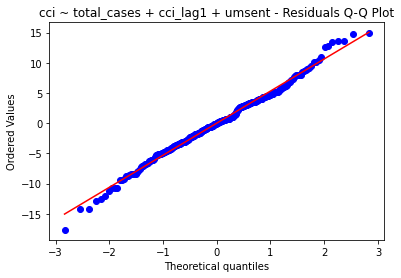

In [152]:
# checking the assumption of normality --homoskedasticity
#      data skew and model fit
from scipy import stats

stats.probplot(summary.resid, dist="norm", plot= plt)
plt.title("cci ~ total_cases + cci_lag1 + umsent - Residuals Q-Q Plot")

#Saving plot as a png
#plt.savefig("Model1_Resid_qqplot.png")

Text(0.5, 1.0, 'cci ~ total_cases + cci_lag1 + ism-man - Residuals Q-Q Plot')

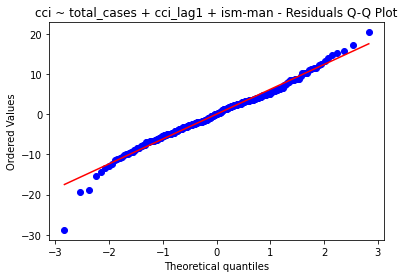

In [144]:
from scipy import stats

stats.probplot(summary1.resid, dist="norm", plot= plt)
plt.title("cci ~ total_cases + cci_lag1 + ism-man - Residuals Q-Q Plot")

#Saving plot as a png
#plt.savefig("Model1_Resid_qqplot.png")

Text(0.5, 1.0, 'cci ~ total_cases + cci_lag1 + ism_non - Residuals Q-Q Plot')

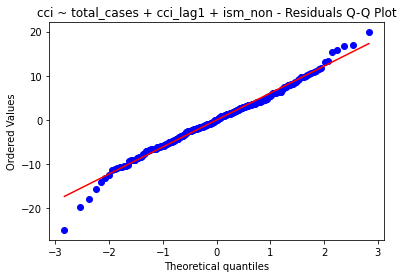

In [145]:
from scipy import stats

stats.probplot(summary2.resid, dist="norm", plot= plt)
plt.title("cci ~ total_cases + cci_lag1 + ism_non - Residuals Q-Q Plot")

#Saving plot as a png
#plt.savefig("Model1_Resid_qqplot.png")

In [153]:
table = sm.stats.anova_lm(mo, typ=2)
print(table)

                   sum_sq     df           F        PR(>F)
total_cases   1687.599639    1.0   59.396999  1.963161e-13
cci_lag1     26196.838522    1.0  922.027691  6.307114e-93
umsent        3715.134343    1.0  130.758402  2.533786e-25
Residual      8410.012276  296.0         NaN           NaN


In [147]:
sy = smf.ols('cci ~ total_cases + cci_lag1 + umsent', df)
mo = sy.fit()
print(mo.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.963    
Dependent Variable: cci              AIC:                1859.3818
Date:               2022-11-08 14:33 BIC:                1874.1970
No. Observations:   300              Log-Likelihood:     -925.69  
Df Model:           3                F-statistic:        2580.    
Df Residuals:       296              Prob (F-statistic): 8.59e-212
R-squared:          0.963            Scale:              28.412   
------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
Intercept       -26.0172   2.7582 -9.4327 0.0000 -31.4454 -20.5891
total_cases       0.0000   0.0000  7.7069 0.0000   0.0000   0.0000
cci_lag1          0.7284   0.0240 30.3649 0.0000   0.6812   0.7756
umsent            0.5963   0.0521 11.4350 0.0000   0.4937   0.6989
-------------

In [148]:
pg = df.corr()
# pg = pg.to_csv('resid_q-q_plot.csv', encoding='utf-8')
pg

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,positive_rate,stringency_index,cci,cci_cur,cci_exp,umsent,umsent_cur,umsent_exp,ism_man,ism_non,cci_lag1,cci_lag2,cci_lag3,cci_lag4,cci_lag5,total_cases_lag1,total_cases_lag2,total_deaths_lag1,total_deaths_lag2
total_cases,1.000000,0.731918,0.675118,0.983190,0.646423,0.633434,0.595817,0.094413,0.152775,-0.035227,-0.329655,-0.387146,-0.269706,0.253471,0.280734,0.098416,0.100656,0.099427,0.098822,0.099753,0.995610,0.987893,0.985699,0.986382
new_cases,0.731918,1.000000,0.916267,0.760064,0.857942,0.829708,0.700117,0.045618,0.074558,-0.018546,-0.279644,-0.328161,-0.228921,0.244688,0.237940,0.060226,0.080145,0.084317,0.081383,0.089600,0.678265,0.667050,0.742266,0.736626
new_cases_smoothed,0.675118,0.916267,1.000000,0.698959,0.748111,0.856726,0.629771,0.045807,0.070557,-0.010404,-0.248900,-0.292073,-0.203722,0.229843,0.208248,0.059576,0.072448,0.073124,0.070697,0.077625,0.613095,0.597711,0.680348,0.673357
total_deaths,0.983190,0.760064,0.698959,1.000000,0.698337,0.679986,0.699750,0.104197,0.151590,-0.006539,-0.326883,-0.390106,-0.262853,0.289170,0.325448,0.104871,0.104026,0.102212,0.102017,0.103211,0.977683,0.969486,0.998647,0.995180
new_deaths,0.646423,0.857942,0.748111,0.698337,1.000000,0.780809,0.842179,0.041404,0.042262,0.031403,-0.262999,-0.316011,-0.210001,0.223233,0.200169,0.048653,0.082889,0.102229,0.099910,0.103438,0.597031,0.559952,0.668050,0.648733
positive_rate,0.633434,0.829708,0.856726,0.679986,0.780809,1.000000,0.815777,0.029913,0.036349,0.011809,-0.293179,-0.347612,-0.237528,0.150051,0.120814,0.066128,0.098298,0.105567,0.110448,0.123641,0.592931,0.585901,0.660024,0.651238
stringency_index,0.595817,0.700117,0.629771,0.699750,0.842179,0.815777,1.000000,0.058560,0.041374,0.079636,-0.264573,-0.327748,-0.204056,0.241556,0.233188,0.064402,0.078727,0.092404,0.102061,0.110610,0.571304,0.549348,0.672832,0.647972
cci,0.094413,0.045618,0.045807,0.104197,0.041404,0.029913,0.058560,1.000000,0.964905,0.867310,0.833912,0.805629,0.808655,0.228768,0.497086,0.973085,0.945451,0.924406,0.903368,0.885514,0.096609,0.097056,0.106030,0.105984
cci_cur,0.152775,0.074558,0.070557,0.151590,0.042262,0.036349,0.041374,0.964905,1.000000,0.706160,0.740469,0.738266,0.701386,0.104047,0.399183,0.961758,0.952111,0.941246,0.929963,0.921167,0.156324,0.158200,0.156317,0.159375
cci_exp,-0.035227,-0.018546,-0.010404,-0.006539,0.031403,0.011809,0.079636,0.867310,0.706160,1.000000,0.844950,0.772888,0.850914,0.419530,0.583720,0.800775,0.744593,0.708455,0.673085,0.641569,-0.036028,-0.038360,-0.010556,-0.016481


How do I read this?

eval_env: 1


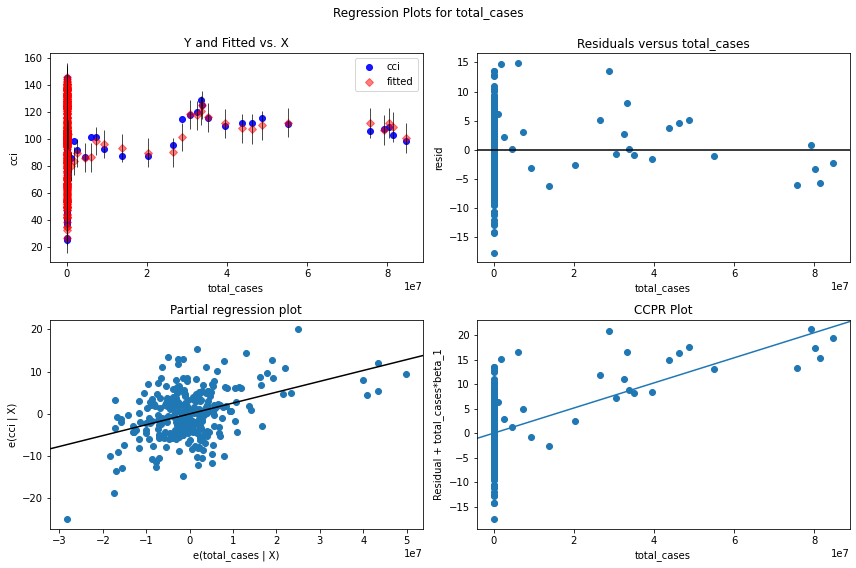

In [159]:
#define figure size
fig =plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(mo, 'total_cases', fig=fig)


- 'Y and Fitted vs X' and 'Residuals vs fitted' -- checks linear assumptions of linearity, normality, constant variance (violated-hetero, makes cone shape), and independence. </br>
https://analyse-it.com/docs/user-guide/fit-model/linear/residual-plot

- Partial Regression Plot -- checks inluential points and linearity

- Partial Regression Plot -- checks inluential points, relationship between a regressor and response </br>
by taking into account the other independent variables. The line is if x was highly correlated with any </br>
of the other independent variables.

test for heteroskedasticity

/Users/mauricefreese/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


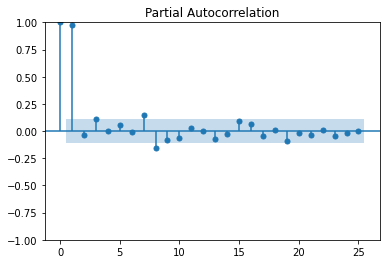

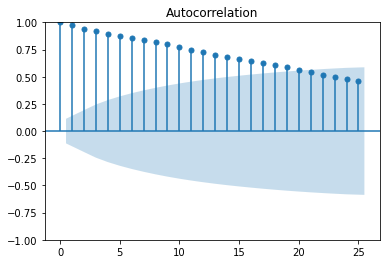

In [167]:
# can determine order of AR model 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

pacf = plot_pacf(df['cci'], lags=25)
acf = plot_acf(df['cci'], lags=25)

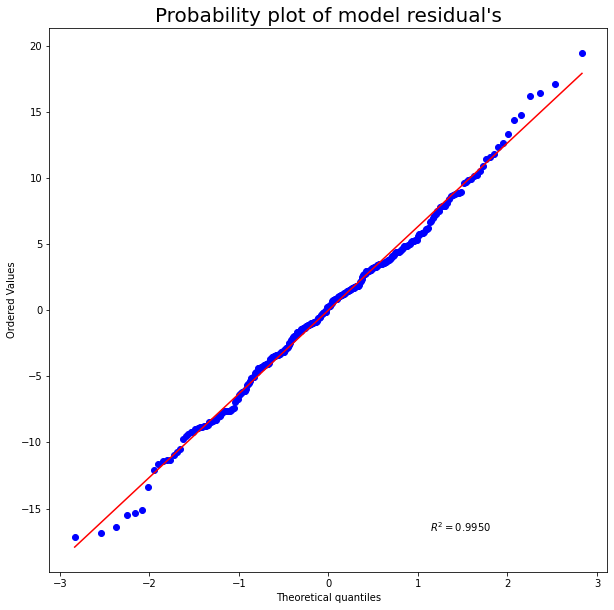

In [101]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(mo.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

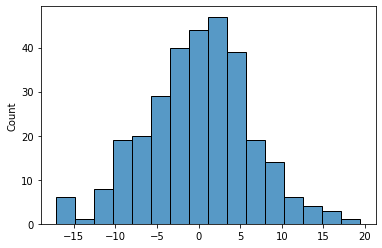

In [102]:
import seaborn as sns
sns.histplot(mo.resid);

In [103]:
mu, std = stats.norm.fit(mo.resid)
mu, std

(5.0401164723249776e-14, 6.290935504613382)

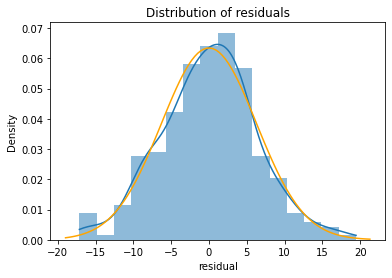

In [105]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=mo.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

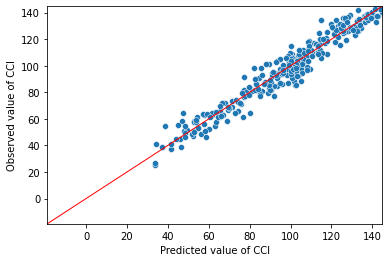

In [108]:
mo.fittedvalues
Y_max = y.max()
Y_min = x.min()

ax = sns.scatterplot(x=mo.fittedvalues, y=y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of CCI")
ax.set_ylabel("Observed value of CCI")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

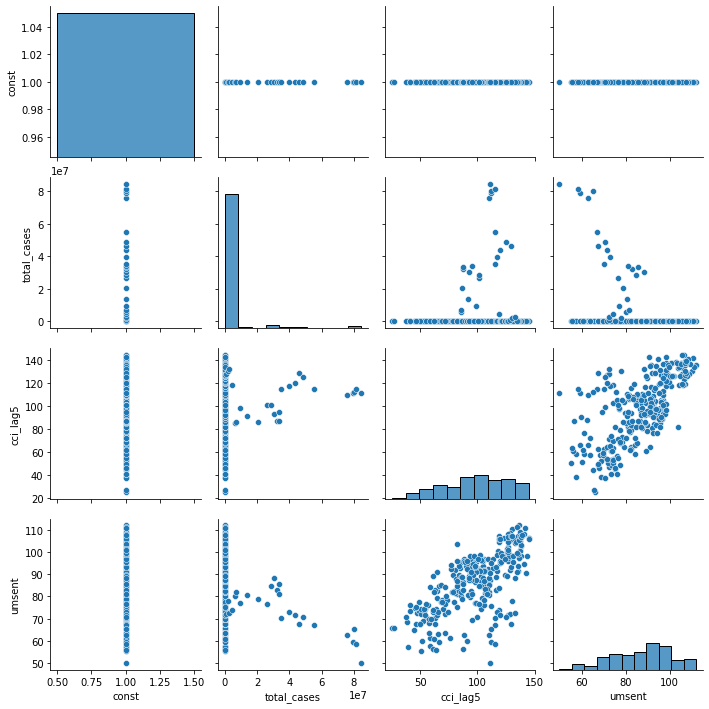

In [117]:
sns.pairplot(x)


In [122]:
# correlation of model 
round(x.corr(),3)

,const,total_cases,cci_lag5,umsent
const,NaN,NaN,NaN,NaN
total_cases,NaN,1.00,0.100,-0.330
cci_lag5,NaN,0.10,1.000,0.677
umsent,NaN,-0.33,0.677,1.000


In [128]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
 
# Define PLS object
pls = PLSRegression(n_components=5)
 
# Fit
pls.fit(x_columns, y)
 
# Cross-validation
y_cv = cross_val_predict(pls, x_columns, y, cv=10)
 
# Calculate scores
score = r2_score(y, y_cv)
mse = mean_squared_error(y, y_cv)

ValueError: Found input variables with inconsistent numbers of samples: [3, 300]